# Exploratory Data Analysis on High Elo Chess Games Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('enriched_mid_elo_games.csv')
df.head()

,white,black,white_elo,black_elo,result,opening,eco,site,time_control,termination,...,black_country,black_title,black_preferred_game,black_peak_bullet,black_peak_blitz,black_peak_rapid,black_peak_classical,black_total_wins,black_total_draws,black_total_losses
0,Wallerdos,chilico,1763,2010,0-1,?,?,https://lichess.org/npDpU5Pm,300+0,Abandoned,...,NaN,NaN,blitz,2003.0,2092.0,2111.0,NaN,25662,1220,12853
1,shadowtiger,BillDecant5,1677,1669,1-0,Sicilian Defense: Smith-Morra Gambit #2,B21,https://lichess.org/OWLzXHxG,300+0,Normal,...,NaN,NaN,rapid,NaN,NaN,NaN,NaN,1756,146,2010
2,communist23,adrielpavan,1959,1879,1-0,Sicilian Defense: Bowdler Attack,B20,https://lichess.org/1dEnOHWF,60+0,Normal,...,NaN,NaN,bullet,NaN,NaN,NaN,NaN,970,93,956
3,Bayron7,Toutatis,1764,1751,1-0,English Defense #2,A40,https://lichess.org/t9YpbMkr,60+0,Normal,...,NaN,NaN,unknown,NaN,NaN,NaN,NaN,0,0,0
4,Fabio77,fullmetall,1554,1599,0-1,Philidor Defense #3,C41,https://lichess.org/yPzk1caC,300+5,Normal,...,NaN,NaN,rapid,NaN,NaN,NaN,NaN,956,147,1245


## Basic Info and Structure

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   white                 1000 non-null   object 
 1   black                 1000 non-null   object 
 2   white_elo             1000 non-null   int64  
 3   black_elo             1000 non-null   int64  
 4   result                1000 non-null   object 
 5   opening               1000 non-null   object 
 6   eco                   1000 non-null   object 
 7   site                  1000 non-null   object 
 8   time_control          1000 non-null   object 
 9   termination           1000 non-null   object 
 10  white_country         0 non-null      float64
 11  white_title           4 non-null      object 
 12  white_preferred_game  1000 non-null   object 
 13  white_peak_bullet     165 non-null    float64
 14  white_peak_blitz      293 non-null    float64
 15  white_peak_rapid      

In [3]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
white,1000,1000,Wallerdos,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
black,1000,1000,chilico,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
white_elo,1000.0,NaN,NaN,NaN,1679.775,196.65098,1093.0,1530.0,1673.5,1814.0,2265.0
black_elo,1000.0,NaN,NaN,NaN,1664.724,194.767719,1134.0,1523.75,1659.5,1808.25,2214.0
result,1000,3,1-0,511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
opening,1000,401,Sicilian Defense,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eco,1000,169,C41,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
site,1000,1000,https://lichess.org/npDpU5Pm,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_control,1000,127,300+0,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
termination,1000,3,Normal,741,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Missing Data Analysis

In [4]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)

white_country           1000
black_country           1000
white_title              996
black_title              996
white_peak_classical     986
black_peak_classical     979
black_peak_rapid         878
white_peak_rapid         865
white_peak_bullet        835
black_peak_bullet        818
black_peak_blitz         714
white_peak_blitz         707
dtype: int64

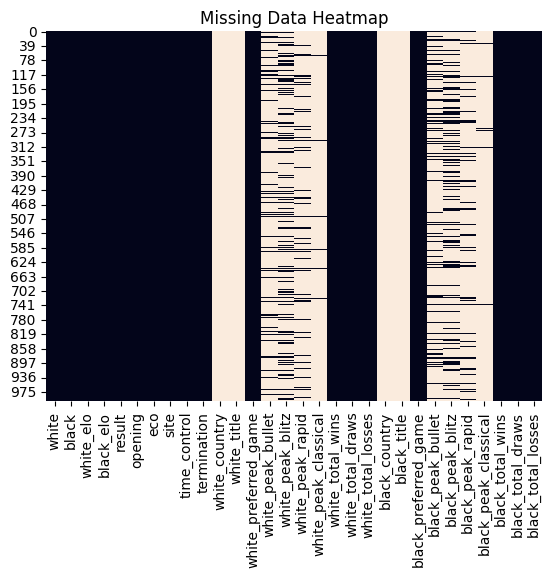

In [5]:
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Data Heatmap')
plt.show()

## Missing Data Handling

In [6]:
# Drop columns with 30% or lower non-null values (70% or more missing)
threshold = 0.30
df_cleaned = df.dropna(thresh=int(threshold * len(df)), axis=1)

# Check the shape after dropping the columns
print(f"Shape after dropping columns: {df_cleaned.shape}")

Shape after dropping columns: (1000, 18)


## Distribution of Elo Ratings

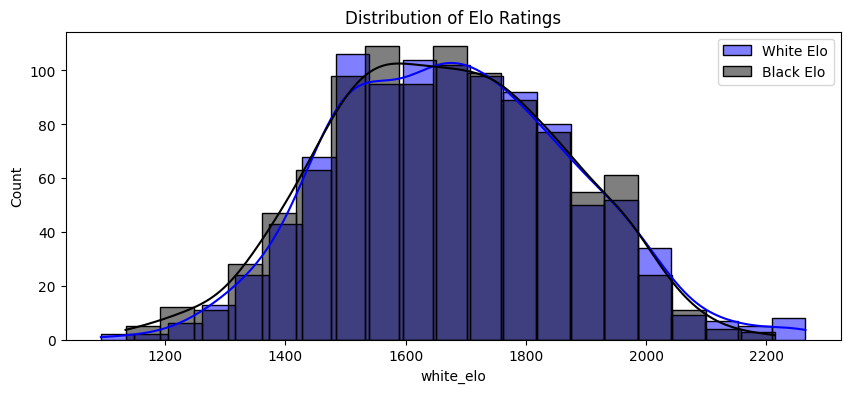

In [7]:
plt.figure(figsize=(10, 4))
sns.histplot(df_cleaned['white_elo'], kde=True, color='blue', label='White Elo')
sns.histplot(df_cleaned['black_elo'], kde=True, color='black', label='Black Elo')
plt.legend()
plt.title('Distribution of Elo Ratings')
plt.show()

## Echo Analysis for Avg. Total game

In [8]:
# Compute total games and win rate for white
df['white_total_games'] = df['white_total_wins'] + df['white_total_draws'] + df['white_total_losses']
df['white_win_rate'] = df['white_total_wins'] / df['white_total_games']

# Compute total games and win rate for black
df['black_total_games'] = df['black_total_wins'] + df['black_total_draws'] + df['black_total_losses']
df['black_win_rate'] = df['black_total_wins'] / df['black_total_games']

# Handle division by zero and missing data (median imputation)
white_median_games = df[df['white_total_games'] > 0]['white_total_games'].median()
black_median_games = df[df['black_total_games'] > 0]['black_total_games'].median()

white_median_win_rate = df[df['white_total_games'] > 0]['white_win_rate'].median()
black_median_win_rate = df[df['black_total_games'] > 0]['black_win_rate'].median()

# Impute
df['white_total_games'] = df['white_total_games'].replace(0, white_median_games)
df['white_win_rate'] = df['white_win_rate'].fillna(white_median_win_rate)

df['black_total_games'] = df['black_total_games'].replace(0, black_median_games)
df['black_win_rate'] = df['black_win_rate'].fillna(black_median_win_rate)

# Cell 4: Compute average experience per game (combined)
df['avg_total_games'] = (df['white_total_games'] + df['black_total_games']) / 2

# Cell 5: Top ECO codes by average player experience
top_eco_experience = (
    df.groupby(['eco', 'opening'])['avg_total_games']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Display top 10 ECO codes by average player experience
top_eco_experience.head(20)

,eco,opening,avg_total_games
0,B06,"Pterodactyl Defense: Eastern, Anhanguera",115912.500000
1,A03,Bird Opening,110603.750000
2,B02,Alekhine Defense: Two Pawn Attack,95932.500000
3,B11,Caro-Kann Defense,84957.000000
4,A22,English Opening: Carls-Bremen System,71910.500000
5,D07,"Queen's Gambit Refused: Chigorin Defense, Main...",71368.000000
6,B72,"Sicilian Defense: Dragon Variation, Classical ...",68170.000000
7,B00,Nimzowitsch Defense: French Connection,66338.000000
8,A08,King's Indian Attack: Sicilian Variation,61680.500000
9,A00,Van Geet Opening,60453.250000


## Preferred Game Types

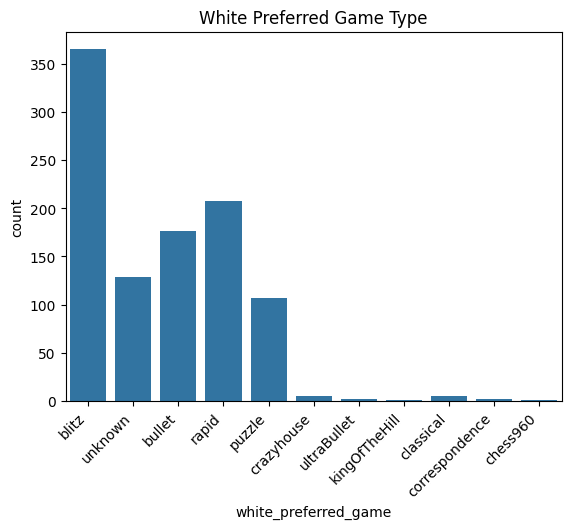

In [9]:
sns.countplot(x='white_preferred_game', data=df_cleaned)
plt.title('White Preferred Game Type')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels by 45 degrees for better readability
plt.show()

## Game Result Distribution

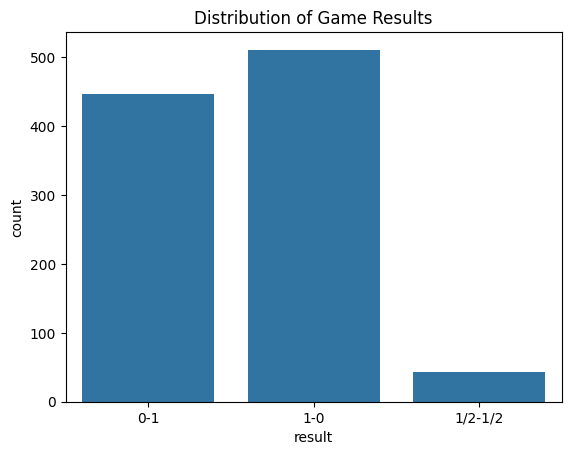

In [10]:
sns.countplot(x='result', data=df_cleaned)
plt.title('Distribution of Game Results')
plt.show()

## Opening Analysis

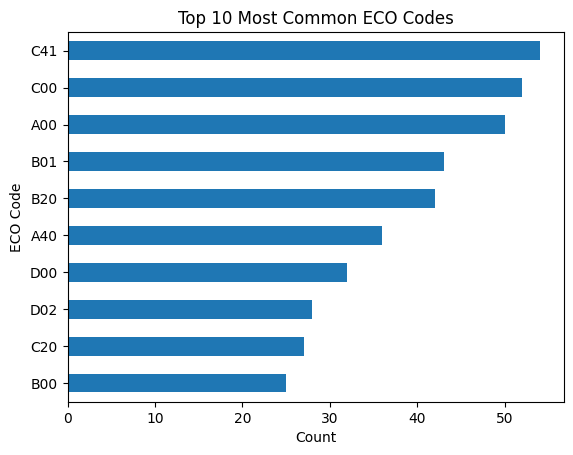

In [11]:
# Get the top 10 most common ECO codes
top_eco = df_cleaned['eco'].value_counts().head(10)

# Plot the top 10 most common ECO codes
top_eco.plot(kind='barh')
plt.title('Top 10 Most Common ECO Codes')
plt.gca().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('ECO Code')
plt.show()

## Elo vs Game Result

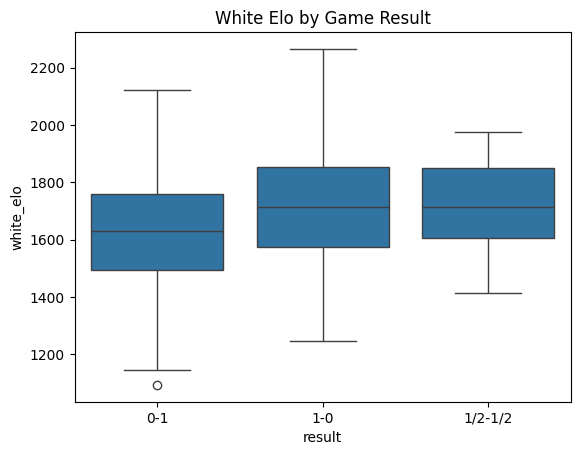

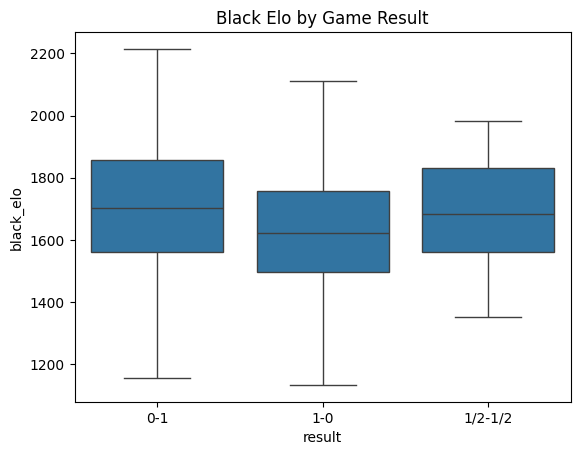

In [12]:
sns.boxplot(x='result', y='white_elo', data=df_cleaned)
plt.title('White Elo by Game Result')
plt.show()

sns.boxplot(x='result', y='black_elo', data=df_cleaned)
plt.title('Black Elo by Game Result')
plt.show()

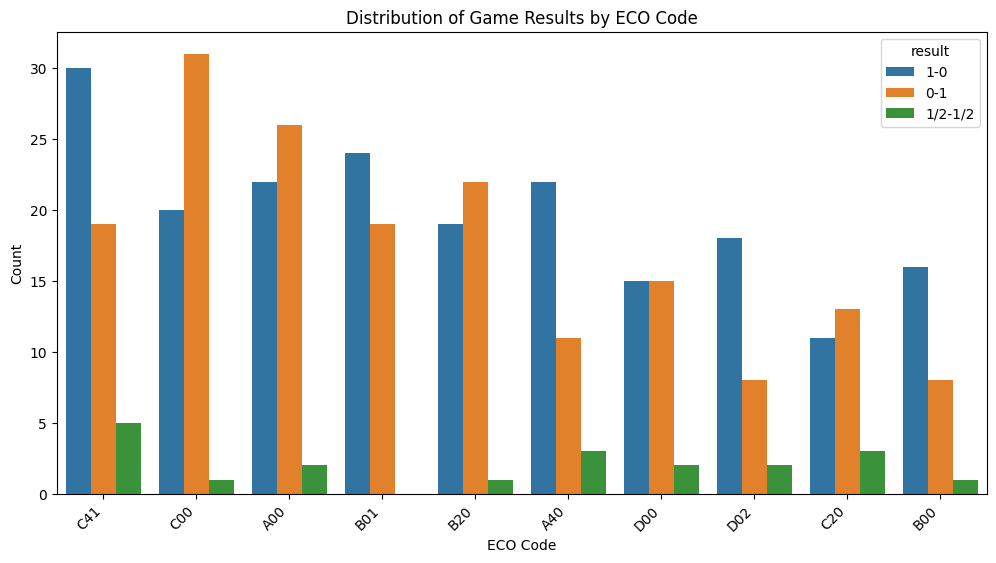

In [13]:
# Get the top 10 most common ECO codes
top_eco = df_cleaned['eco'].value_counts().head(10)

# Create a new DataFrame that only includes the top 10 ECO codes
top_eco_df = df_cleaned[df_cleaned['eco'].isin(top_eco.index)]

# Plot the distribution of results for these ECO codes
plt.figure(figsize=(12, 6))
sns.countplot(x='eco', hue='result', data=top_eco_df, order=top_eco.index)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Game Results by ECO Code')
plt.xlabel('ECO Code')
plt.ylabel('Count')
plt.show()

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# C41 games (Philidor Defense)
c41_games = df_cleaned[df_cleaned['eco'] == 'C41']
c41_draws = (c41_games['result'] == '1/2-1/2').sum()
c41_total = ((c41_games['result'] == '1-0') | 
             (c41_games['result'] == '0-1') | 
             (c41_games['result'] == '1/2-1/2')).sum()

# All other openings
other_games = df_cleaned[df_cleaned['eco'] != 'C41']
other_draws = (other_games['result'] == '1/2-1/2').sum()
other_total = ((other_games['result'] == '1-0') | 
               (other_games['result'] == '0-1') | 
               (other_games['result'] == '1/2-1/2')).sum()

# Print data for clarity
print(f"C41 - Draws: {c41_draws}, Total games: {c41_total}")
print(f"Other openings - Draws: {other_draws}, Total games: {other_total}")

# Run one-sided two-proportion z-test (H₁: C41 draw rate > other openings' draw rate)
counts = [c41_draws, other_draws]
nobs = [c41_total, other_total]

stat, p_value = proportions_ztest(count=counts, nobs=nobs, alternative='larger')

print(f"p-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: C41 significantly increases the draw rate in mid Elo.")
else:
    print("Fail to reject the null hypothesis: No strong evidence that C41 leads to more draws than other openings in mid Elo.")

C41 - Draws: 5, Total games: 54
Other openings - Draws: 38, Total games: 946
p-value: 0.03237017019024073
Reject the null hypothesis: C41 significantly increases the draw rate at mid Elo.
